In [1]:
from google.colab import drive
drive.mount('/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from tqdm.notebook import tqdm
tqdm.pandas()

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [2]:
HOME = "/drive/My Drive/RISTEK/sunjad/"

In [3]:
!ls "$HOME"

classes.csv	     major.json		Sunjad_user_schedule.ipynb
course_schedule.csv  period.csv		user.csv
courses.csv	     period.json	user.json
faculty.json	     Sunjad_EDA.ipynb	user_schedule.csv
lecturers.csv	     Sunjad_Geo.ipynb	user_schedule.gsheet
major.csv	     Sunjad_user.ipynb	user_schedule.json


In [4]:
u = pd.read_csv(HOME+"user.csv")
u.head(1)

,name,username,npm,batch,user_id,major,last_update_course_at
0,Fahdii Ajmalal Fikrie,fahdii.ajmalal91,1.906398e+09,2019.0,60f4f2b38cd53dc0e3b371ba,60f4f2b38cd53dc0e3b371b9,2021-08-03T06:03:53.099Z


In [25]:
print(pd.to_datetime(u['last_update_course_at']).min())
print(pd.to_datetime(u['last_update_course_at']).max())

2021-07-19 05:42:32.611000+00:00
2021-08-21 15:18:23.425000+00:00


In [5]:
m = pd.read_csv(HOME+"major.csv")
m.head(1)

,name,kd_org,id
0,Ilmu Komputer (Computer Science),01.00.12.01,60f4f2b38cd53dc0e3b371b9


In [6]:
m.shape

(129, 3)

In [7]:
df = pd.merge(u, m, how='inner', left_on='major', right_on='id').rename({'name_x': 'name', 'name_y': "major_name", 'id': 'major_id'}, axis=1)
df.head(1)

,name,username,npm,batch,user_id,major,last_update_course_at,major_name,kd_org,major_id
0,Fahdii Ajmalal Fikrie,fahdii.ajmalal91,1.906398e+09,2019.0,60f4f2b38cd53dc0e3b371ba,60f4f2b38cd53dc0e3b371b9,2021-08-03T06:03:53.099Z,Ilmu Komputer (Computer Science),01.00.12.01,60f4f2b38cd53dc0e3b371b9


In [8]:
df.shape

(4653, 10)

In [9]:
data = df.groupby(by=['major_id', 'major_name'])[['user_id']].count().reset_index().rename({'user_id': "total_user_id"}, axis=1)
data.head()

,major_id,major_name,total_user_id
0,60f4f2b38cd53dc0e3b371b9,Ilmu Komputer (Computer Science),483
1,60f4f3068cd53dc0e3b371bc,Sistem Informasi (Information System),451
2,60f4f3558cd53dc0e3b371bf,Ilmu Komputer (Computer Science),171
3,60f4f74d8cd53dc0e3b371c6,Ilmu Keperawatan (Nursing Science),55
4,60f4fcfe8cd53dc0e3b371cb,Fisika (Physics),11


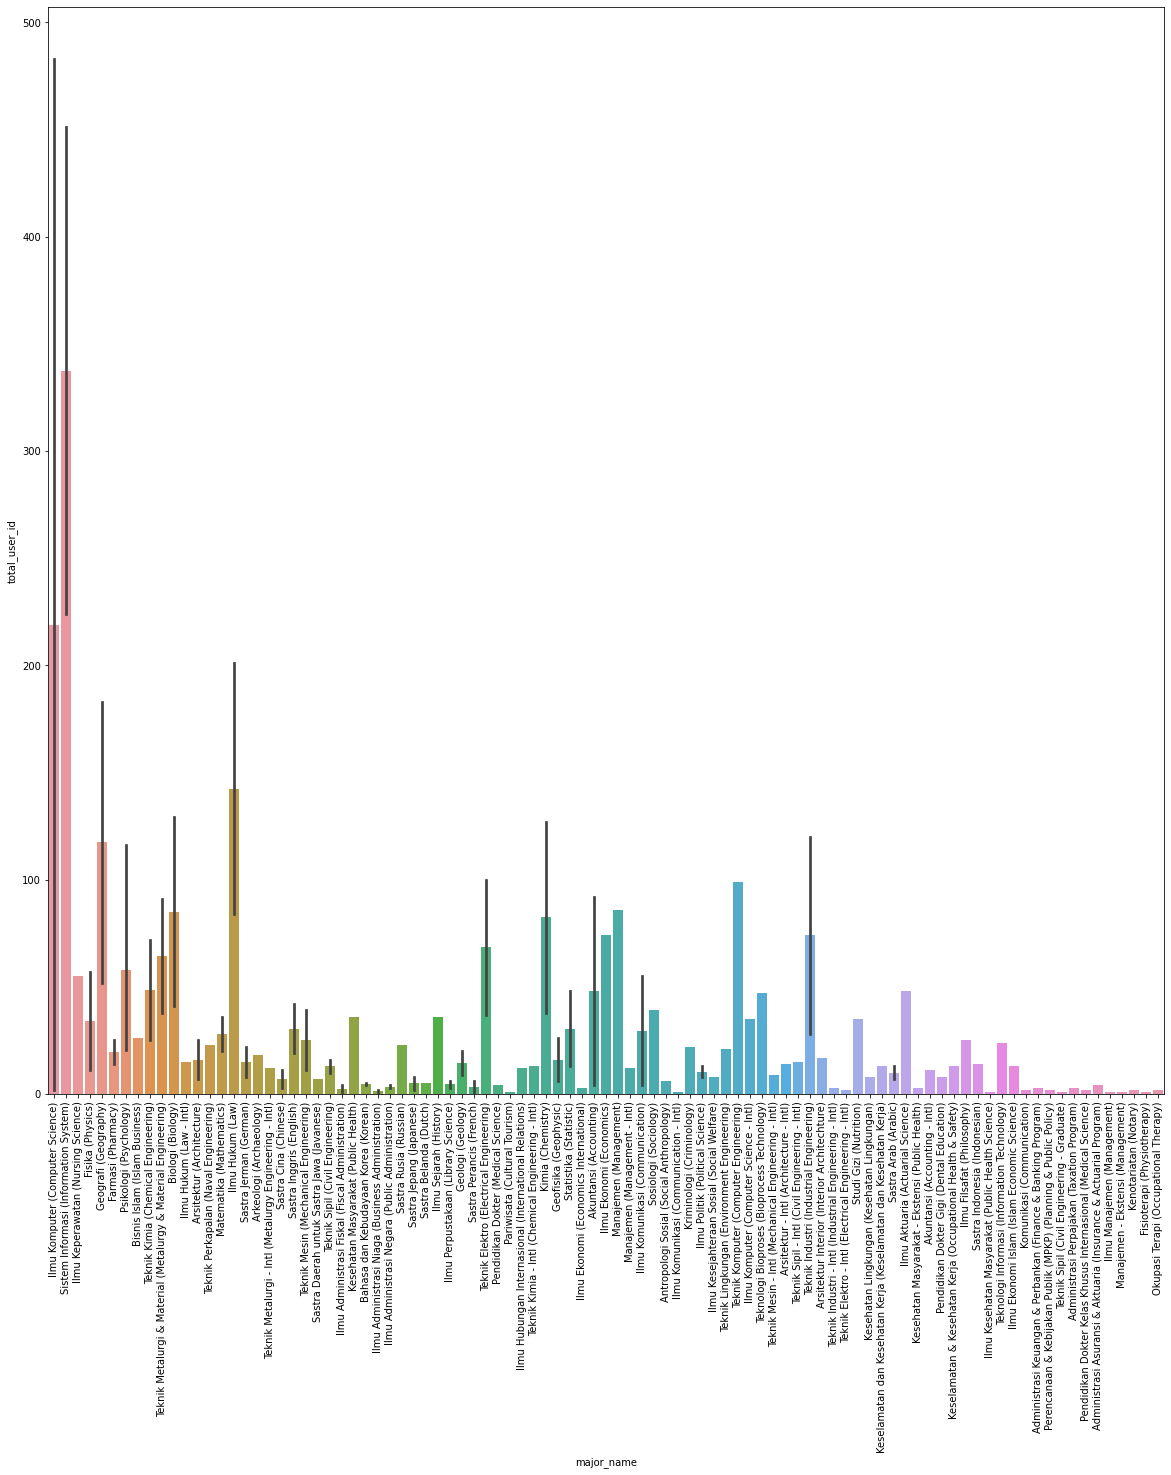

In [10]:
plt.figure(figsize=(20, 20))
plot = sns.barplot(x=data['major_name'], y=data['total_user_id'])
plot.axes.tick_params(axis='x', rotation=90)

In [11]:
faculty = pd.read_json(HOME+'faculty.json').T.reset_index().rename({'index': 'kd_org'}, axis=1)
faculty.head(2)

,kd_org,faculty,study_program,educational_program
0,04.00.01.01,KEDOKTERAN,Pendidikan Dokter (Medical Science),S1 Reguler (Undergraduate Program)
1,05.00.01.01,KEDOKTERAN,Pendidikan Dokter Kelas Khusus Internasional (...,S1 Kls Internasional (Intl. Class Undergraduat...


In [12]:
fm = pd.merge(faculty, m, how='inner', left_on='kd_org', right_on='kd_org')
fm.head(1)

,kd_org,faculty,study_program,educational_program,name,id
0,04.00.01.01,KEDOKTERAN,Pendidikan Dokter (Medical Science),S1 Reguler (Undergraduate Program),Pendidikan Dokter (Medical Science),60fbdfd2752be98a2e59f771


In [13]:
fm.shape

(129, 6)

In [14]:
df2 = pd.merge(fm, df, how='inner', left_on='kd_org', right_on='kd_org')

In [15]:
data2 = df2.groupby(by=['faculty'])[['user_id']].count().reset_index().rename({'user_id': "total_user_id"}, axis=1)

In [16]:
df2['user_id'].shape

(4653,)

In [17]:
df2['user_id'].unique().shape

(4653,)

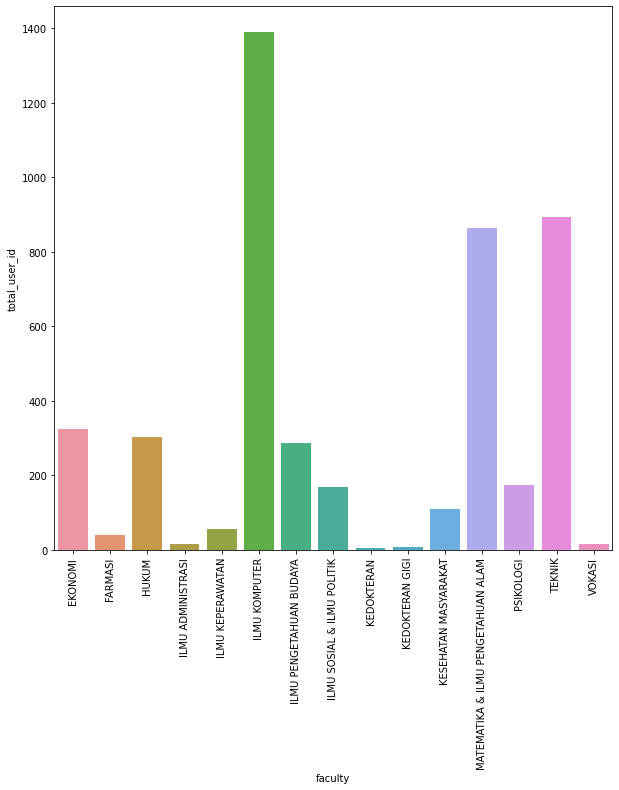

In [18]:
plt.figure(figsize=(10, 10))
plot = sns.barplot(x=data2['faculty'], y=data2['total_user_id'])
plot.axes.tick_params(axis='x', rotation=90)